In [143]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Observable
from braket.devices import LocalSimulator

In [144]:
# set up device
device = LocalSimulator('braket_sv')

Inspect all available gates

In [145]:
gate_set = [attr for attr in dir(Gate) if attr[0].isupper()]
print(gate_set)

['CCNot', 'CNot', 'CPhaseShift', 'CPhaseShift00', 'CPhaseShift01', 'CPhaseShift10', 'CSwap', 'CV', 'CY', 'CZ', 'ECR', 'GPi', 'GPi2', 'H', 'I', 'ISwap', 'MS', 'PSwap', 'PhaseShift', 'PulseGate', 'Rx', 'Ry', 'Rz', 'S', 'Si', 'Swap', 'T', 'Ti', 'Unitary', 'V', 'Vi', 'X', 'XX', 'XY', 'Y', 'YY', 'Z', 'ZZ']


In [146]:
for iter in device.properties.action['braket.ir.jaqcd.program'].supportedResultTypes:
    print(iter)

name='Sample' observables=['x', 'y', 'z', 'h', 'i', 'hermitian'] minShots=1 maxShots=9223372036854775807
name='Expectation' observables=['x', 'y', 'z', 'h', 'i', 'hermitian'] minShots=0 maxShots=9223372036854775807
name='Variance' observables=['x', 'y', 'z', 'h', 'i', 'hermitian'] minShots=0 maxShots=9223372036854775807
name='Probability' observables=None minShots=0 maxShots=9223372036854775807
name='StateVector' observables=None minShots=0 maxShots=0
name='DensityMatrix' observables=None minShots=0 maxShots=0
name='Amplitude' observables=None minShots=0 maxShots=0


In [147]:
# For now, only stick to one-qubit gates
list_operators = ['CNot', 'H', 'I', 'Rx', 'Ry', 'Rz', 'X', 'Y', 'Z']

In [148]:
def get_random_circuit(n_qubits, operators):
    """
    Generate a random quantum circuit for a given number of qubits and a list of operators.
    """
    
    qc = Circuit()

    for q in range(n_qubits):
        gate = np.random.choice(operators)
            
        if gate == 'CNot':
            control_qubit = random.randint(0, n_qubits - 1)
            target_qubit = random.choice([i for i in range(n_qubits) if i != control_qubit])
            qc.cnot(control=control_qubit, target=target_qubit)
        elif gate == 'H':
            qc.h(q)
        elif gate == 'I':
            qc.i(q)
        elif gate == 'X':
            qc.x(q)
        elif gate == 'Y':
            qc.y(q)
        elif gate == 'Z':
            qc.z(q)    
        elif gate == 'Rx':
            angle = round(random.uniform(0, 2*np.pi), 2)
            qc.rx(q, angle)
        elif gate == 'Ry':
            angle = round(random.uniform(0, 2*np.pi), 2)
            qc.ry(q, angle)
        elif gate == 'Rz':
            angle = round(random.uniform(0, 2*np.pi), 2)
            qc.rz(q, angle)    

    return qc

In [149]:
n_qubits = 2

In [150]:
circ = get_random_circuit(n_qubits=n_qubits, operators=list_operators)
print(circ)

T  : |0|
        
q0 : -H-
        
q1 : -Y-

T  : |0|


In [151]:
# circ.state_vector()

In [152]:
# run circuit
"""m_shots = 1
state_vector = device.run(circ, shots=0).result().values[0]
print(state_vector)"""

"""# get measurement shots
counts = result.measurement_counts
# print counts
list_one = list(counts)[0]
array_one = np.array([list_one])"""

# print(counts)

'# get measurement shots\ncounts = result.measurement_counts\n# print counts\nlist_one = list(counts)[0]\narray_one = np.array([list_one])'

In [153]:
circ.expectation(observable=Observable.X(), target=0)
exp_value = device.run(circ, shots=100).result().values[0]
print(exp_value)

1.0


## Use Qiskit modules run on AWS LocalBackend

In [169]:
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator

In [177]:
circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
display(circuit.draw())

┌───┐┌─────────┐                               
q_0: ┤ X ├┤ P(-π/4) ├──■──────────────■─────────────
     └─┬─┘└─────────┘┌─┴─┐┌────────┐┌─┴─┐┌─────────┐
q_1: ──■─────────────┤ X ├┤ P(π/4) ├┤ X ├┤ P(-π/4) ├
                     └───┘└────────┘└───┘└─────────┘

In [171]:
estimator = Estimator()

In [174]:
observable = SparsePauliOp("IZ")
print(f">>> Observable: {observable.paulis}")

>>> Observable: ['IZ']


In [175]:
job = estimator.run(circuit, observable)
result = job.result()
print(f"  > Expectation value: {result.values[0]}")

  > Expectation value: 1.0


## PennyLane

In [207]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

n_qubits = 1

print('Number of qubits: ', n_qubits)
device = qml.device('default.qubit', wires=n_qubits)

Number of qubits:  1


In [208]:
@qml.qnode(device)
def circuit(theta):
    qml.RX(theta, wires=0)
    return qml.probs(wires=0)

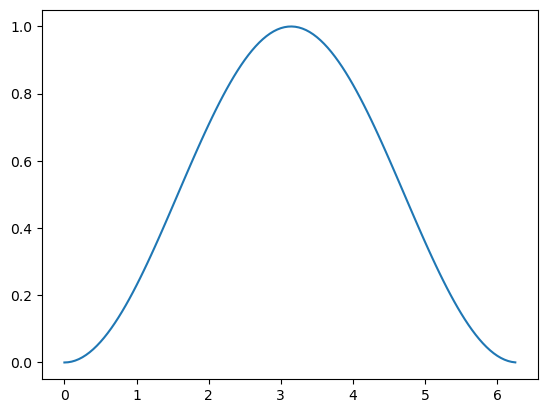

In [209]:
thetas = np.arange(0, 2 * np.pi, 0.05)
probs_one_state = np.array([circuit(theta)[1] for theta in thetas])
plt.plot(thetas, probs_one_state)

In [220]:
print('Optimal rotation angle: ', np.round(thetas[np.argmax(probs_one_state)] / np.pi, 4), 'pi')

Optimal rotation angle:  1.0027 pi
